## ASSOCIATION RULES FOR ONLINE RATAIL

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
data = pd.read_csv('online_retail.csv')

# Explore Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom


In [6]:
data.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Total number of transactions
len(data['InvoiceNo'].unique())

25900

In [9]:
#Number of transactions with anonymous customers 
len(data[data['CustomerID'].isnull()]['InvoiceNo'].unique())

3710

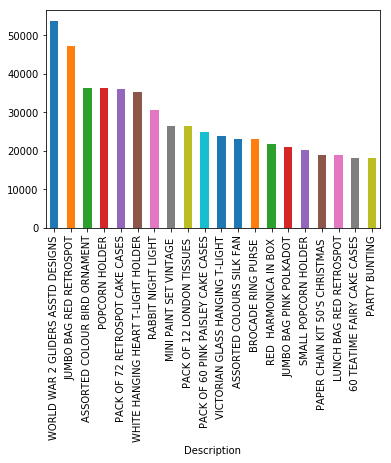

In [12]:
# Frequently sold items by quantitiy
gp_stockcode = data.groupby('Description')
gp_stockcode_frq_quantitiy = gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [14]:
# Explore By Countries #
gp_country = data.groupby('Country')
# Order countries by number of invoices
gp_country['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Greece                      6
Canada                      6
European Community          5
Czech Republic              5
Lithuania                   4
Bahrain                     4
Un

In [16]:
# Order countries by number of customers
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          3951
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     5
Greece                     4
USA                        4
EIRE                       4
Canada                     4
Bahrain                    3
United Arab Emirates       2
Malta                      2
Singapore                  1
Brazil                     1
Iceland                    1
Saudi Arabia               1
Hong Kong                  1
RSA                        1
Europe

In [19]:
# Work on undefined customers
gp_country_null = data[data['CustomerID'].isnull()].groupby('Country')
#Order countries by number of invoices [For the undefined users]
gp_country_null['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom    3637
EIRE                41
Hong Kong           15
Unspecified          5
Switzerland          3
Israel               3
France               3
Bahrain              2
Portugal             1
Name: InvoiceNo, dtype: int64

# Data Cleaning

In [20]:
# Clean up spaces in description and remove any rows that don't have a valid invoice
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [21]:
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data= data[~data['InvoiceNo'].str.contains('C')]

In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom


# Make Associations

In [23]:
basket = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [24]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Show a subset of columns
basket.iloc[:,[0,1,2,3,4,5,6, 7]].head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY
InvoiceNo,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [30]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [31]:
frequent_itemsets

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

In [33]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [34]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
